In [1]:
import json
import pathlib
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Paths
# cluster_classes_file = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClustering\13\13_cluster_classes.txt')
# cluster_image = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClustering\13\Juvika_June2022_Pika_L_13.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff')
cluster_classes_file = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClustering\20\20_cluster_classes.txt')
cluster_image = pathlib.Path(r'D:\Bodo_Juvika\Hyperspectral\20220624\Area\M_OverClustering\20\Juvika_June2022_Pika_L_20.bil-SubsetCube-KMEANS-Scalar to Colormap_gray.tiff')

In [3]:
# Class numbering
class_ind = {'Background':0,
             'Sand':1,
             'Seagrass / turf':2,
             'Rockweed':3,
             'Blue mussels':4,
             'Deep water':5}

In [4]:
custom_cmap = matplotlib.colors.ListedColormap(colors=['lightgray','khaki','limegreen','sienna','dodgerblue','darkblue'])

In [5]:
with open(cluster_classes_file, 'r') as textfile:
    cluster_labels = json.load(textfile)

In [6]:
for key,value in cluster_labels.items():
    print(f'{key}: {value}')

Background: []
Sand: [1, 4]
Seagrass / turf: [3, 5, 6]
Rockweed: []
Blue mussels: [0, 2, 7]
Deep water: []


In [7]:
# Find all cluster numbers for this image
cluster_ind = []
for value in cluster_labels.values():
    cluster_ind.extend(value)
cluster_ind = sorted(cluster_ind)

In [8]:
# Load image (need only first layer of grayscale RGB)
image_8bit = skimage.io.imread(cluster_image)[:,:,0]
cluster_values_8bit = np.unique(image_8bit)
image = np.zeros_like(image_8bit,dtype=float)

In [9]:
for cluster_value_index,cluster_value in enumerate(cluster_values_8bit):
    for cluster_name, cluster_indices in cluster_labels.items():
        if (cluster_value_index in cluster_indices):   
            image[image_8bit==cluster_value] = class_ind[cluster_name]

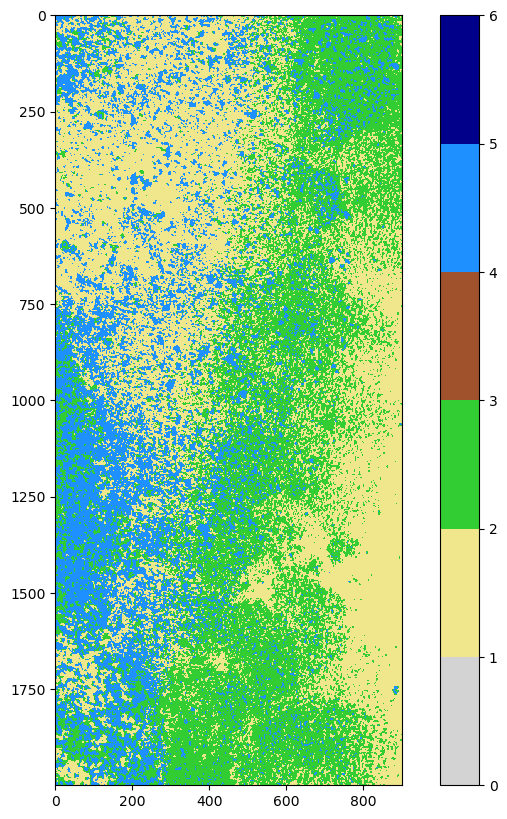

In [10]:
# plt,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,9))
plt.figure(figsize=(10,10))
plt.imshow(image,cmap=custom_cmap,vmin=0,vmax=6,interpolation='none')
plt.colorbar()
plt.show()